#### **Installing uci machine learning repository library to get datasets**

In [64]:
pip install ucimlrepo

#### **installing required libraries**

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier
import lightgbm as lgb
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, log_loss, roc_auc_score, f1_score
from ucimlrepo import fetch_ucirepo
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

#### **fetching 3 required datasets from uni ML repo**

In [66]:
def fetch_dataset_from_uncirepo(id=0):
    dataset = fetch_ucirepo(id=id)
    dataset_df = dataset.data.features 
    target_df = dataset.data.targets
    return dataset_df, target_df

In [67]:
# Bank Marketing Dataset
bank_marketing_df, bank_marketing_target_df = fetch_dataset_from_uncirepo(id=222) 

# Online Shoppers Purchasing Intention Dataset
online_shoppers_df, online_shoppers_target_df = fetch_dataset_from_uncirepo(id=468)

# Estimation of Obesity levels dataset
estimation_of_obesity_df, estimation_of_obesity_target_df = fetch_dataset_from_uncirepo(id=544)

#### **Bank Marketing Dataset Description**

In [6]:
bank_marketing_df

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,NaN
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,NaN
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,NaN


In [7]:
bank_marketing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          45211 non-null  int64 
 1   job          44923 non-null  object
 2   marital      45211 non-null  object
 3   education    43354 non-null  object
 4   default      45211 non-null  object
 5   balance      45211 non-null  int64 
 6   housing      45211 non-null  object
 7   loan         45211 non-null  object
 8   contact      32191 non-null  object
 9   day_of_week  45211 non-null  int64 
 10  month        45211 non-null  object
 11  duration     45211 non-null  int64 
 12  campaign     45211 non-null  int64 
 13  pdays        45211 non-null  int64 
 14  previous     45211 non-null  int64 
 15  poutcome     8252 non-null   object
dtypes: int64(7), object(9)
memory usage: 5.5+ MB


In [8]:
bank_marketing_df.describe()

,age,balance,day_of_week,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [9]:
bank_marketing_df.isna().sum()

age                0
job              288
marital            0
education       1857
default            0
balance            0
housing            0
loan               0
contact        13020
day_of_week        0
month              0
duration           0
campaign           0
pdays              0
previous           0
poutcome       36959
dtype: int64

In [10]:
bank_marketing_target_df

,y
0,no
1,no
2,no
3,no
4,no
...,...
45206,yes
45207,yes
45208,yes
45209,no


#### **Online Shoppers Purchasing Intention Dataset Description**

In [11]:
online_shoppers_df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False


In [12]:
online_shoppers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [13]:
online_shoppers_df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [14]:
online_shoppers_df.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
dtype: int64

In [15]:
online_shoppers_target_df

,Revenue
0,False
1,False
2,False
3,False
4,False
...,...
12325,False
12326,False
12327,False
12328,False


#### **Estimation of Obesity levels dataset Description**

In [16]:
estimation_of_obesity_df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation


In [17]:
estimation_of_obesity_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [18]:
estimation_of_obesity_df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [19]:
estimation_of_obesity_df.isna().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
dtype: int64

In [20]:
estimation_of_obesity_target_df

,NObeyesdad
0,Normal_Weight
1,Normal_Weight
2,Normal_Weight
3,Overweight_Level_I
4,Overweight_Level_II
...,...
2106,Obesity_Type_III
2107,Obesity_Type_III
2108,Obesity_Type_III
2109,Obesity_Type_III


 #### **Data Cleaning and Data Preprocessing for Bank Marketing Dataset**

In [68]:
# Drop contact,poutcome columns from bank_marketing_df
bank_marketing_df = bank_marketing_df.drop(columns=['contact', 'poutcome'])

# Step 1: Drop rows where 'job' is NaN
bank_marketing_df = bank_marketing_df.dropna(subset=['job'])

# Step 2: Fill missing 'education' values with the most frequent value
most_frequent_education = bank_marketing_df['education'].mode()[0]
bank_marketing_df['education'].fillna(value=most_frequent_education, inplace=True)

bank_marketing_target_df = bank_marketing_target_df.loc[bank_marketing_df.index]

In [69]:
object_columns_in_bank_marketing_df = bank_marketing_df.select_dtypes(include='object').columns
print("Object Columns in Bank Marketing: ",object_columns_in_bank_marketing_df)

Object Columns in Bank Marketing:  Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'month'], dtype='object')


In [70]:
# List of columns 
columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'month']

# Loop through each column and print its unique values
for col in columns:
    print(f"Unique values in '{col}': {bank_marketing_df[col].unique()}")

Unique values in 'job': ['management' 'technician' 'entrepreneur' 'blue-collar' 'retired' 'admin.'
 'services' 'self-employed' 'unemployed' 'housemaid' 'student']
Unique values in 'marital': ['married' 'single' 'divorced']
Unique values in 'education': ['tertiary' 'secondary' 'primary']
Unique values in 'default': ['no' 'yes']
Unique values in 'housing': ['yes' 'no']
Unique values in 'loan': ['no' 'yes']
Unique values in 'month': ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']


In [72]:
bank_marketing_df.loan = bank_marketing_df.loan.replace({"yes": 1, "no" : 0})
bank_marketing_df.housing = bank_marketing_df.housing.replace({"yes": 1, "no" : 0})
bank_marketing_df.default = bank_marketing_df.default.replace({"yes": 1, "no" : 0})
bank_marketing_df["marital"] = bank_marketing_df["marital"].replace({'married':2, 'single':1, 'divorced':0})
bank_marketing_df["education"] = bank_marketing_df["education"].replace({'tertiary':2, 'secondary':1, 'primary':0})

In [73]:
# List of columns 
columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'month']

# Loop through each column and print its unique values
for col in columns:
    print(f"Unique values in '{col}': {bank_marketing_df[col].unique()}")

Unique values in 'job': ['management' 'technician' 'entrepreneur' 'blue-collar' 'retired' 'admin.'
 'services' 'self-employed' 'unemployed' 'housemaid' 'student']
Unique values in 'marital': [2 1 0]
Unique values in 'education': [2 1 0]
Unique values in 'default': [0 1]
Unique values in 'housing': [1 0]
Unique values in 'loan': [0 1]
Unique values in 'month': ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']


In [74]:
# Initialize OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse=False)  # drop='first' to avoid multicollinearity

# Assuming 'job' and 'month' are the columns you're encoding
ct = ColumnTransformer(transformers=[('encoder', encoder, ['job', 'month'])], remainder='passthrough')

# Fit and transform the data
# Ensure that bank_marketing_df is defined and includes 'job' and 'month' columns
bank_marketing_df_encoded = ct.fit_transform(bank_marketing_df)

# Convert back to DataFrame (optional step to retain DataFrame structure)
encoded_feature_names = ct.get_feature_names_out()
bank_marketing_df_encoded = pd.DataFrame(bank_marketing_df_encoded, columns=encoded_feature_names)

In [75]:
# Encoding the target variable from 'yes'/'no' to 1/0
bank_marketing_target_df['y'] = bank_marketing_target_df['y'].map({'no': 0, 'yes': 1})

In [76]:
bank_marketing_df_encoded.shape

(44923, 33)

In [77]:
bank_marketing_target_df.shape

(44923, 1)

In [108]:
# Save the DataFrame to a CSV file
bank_marketing_df_encoded.to_csv('bank_marketing_encoding_data.csv', index=False)
bank_marketing_target_df.to_csv('bank_marketing_target.csv', index=False)

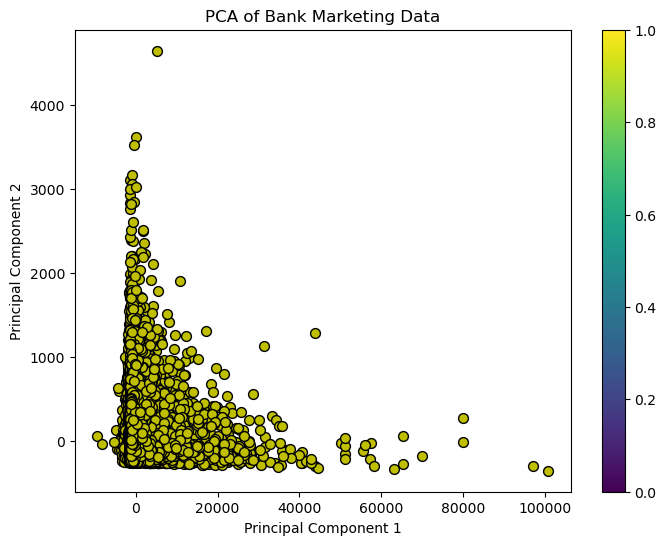

In [78]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(bank_marketing_df_encoded)

plt.figure(figsize=(8, 6))
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=bank_marketing_target_df, cmap='viridis', edgecolor='k', s=50)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Bank Marketing Data')
plt.colorbar()
plt.show()

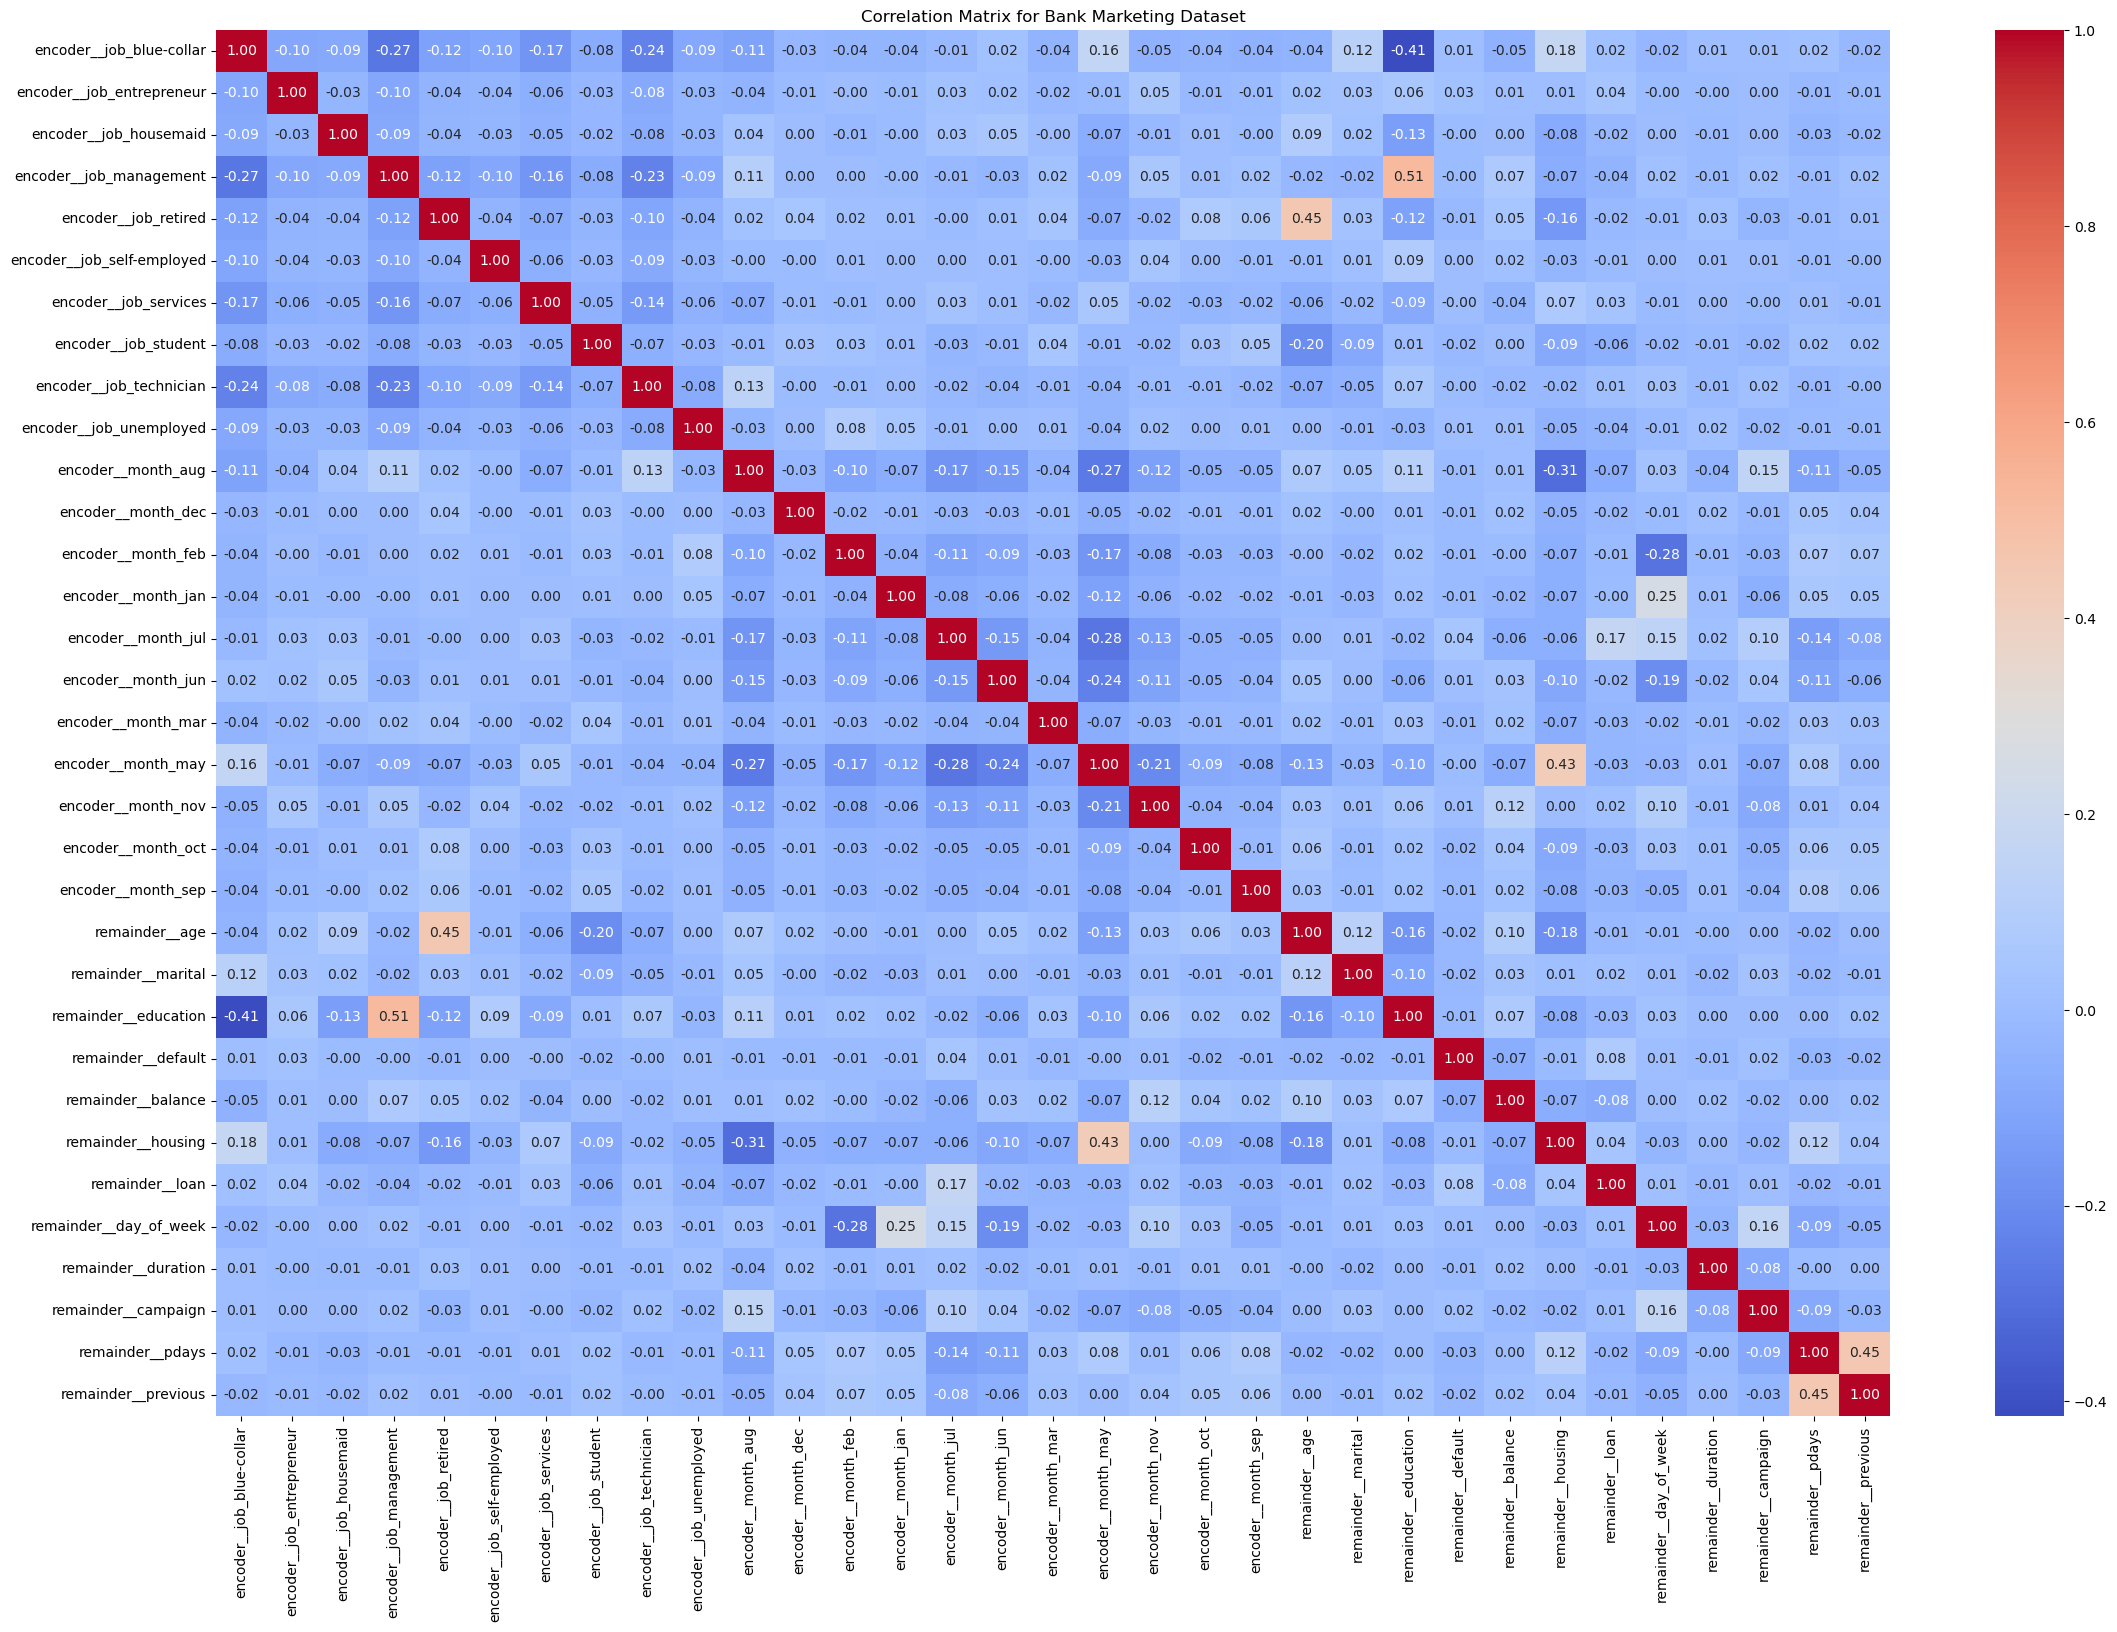

In [79]:
# Correlation matrix and heatmap for Bank Marketing Dataset
plt.figure(figsize=(27, 18))
sns.heatmap(bank_marketing_df_encoded.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix for Bank Marketing Dataset')
plt.show()

 #### **Data Cleaning and Data Preprocessing for Online Shoppers Purchasing Intention Dataset**

In [80]:
object_columns_in_online_shoppers_df = online_shoppers_df.select_dtypes(include='object').columns
print("Object Columns in Online Shoppers: ",object_columns_in_online_shoppers_df)

Object Columns in Online Shoppers:  Index(['Month', 'VisitorType'], dtype='object')


In [81]:
# List of columns 
columns =  ['Month', 'VisitorType']

# Loop through each column and print its unique values
for col in columns:
    print(f"Unique values in '{col}': {online_shoppers_df[col].unique()}")

Unique values in 'Month': ['Feb' 'Mar' 'May' 'Oct' 'June' 'Jul' 'Aug' 'Nov' 'Sep' 'Dec']
Unique values in 'VisitorType': ['Returning_Visitor' 'New_Visitor' 'Other']


In [82]:
online_shoppers_df["VisitorType"] = online_shoppers_df["VisitorType"].replace({'Returning_Visitor':2, 'New_Visitor':1, 'Other':0})

In [83]:
# Initialize OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse=False)  # drop='first' to avoid multicollinearity

# Assuming 'job' and 'month' are the columns you're encoding
ct = ColumnTransformer(transformers=[('encoder', encoder, ['Month'])], remainder='passthrough')

# Fit and transform the data
# Ensure that bank_marketing_df is defined and includes 'job' and 'month' columns
online_shoppers_df_encoded = ct.fit_transform(online_shoppers_df)

# Convert back to DataFrame (optional step to retain DataFrame structure)
encoded_feature_names = ct.get_feature_names_out()
online_shoppers_df_encoded = pd.DataFrame(online_shoppers_df_encoded, columns=encoded_feature_names)

In [84]:
online_shoppers_target_df.Revenue.unique()

array([False,  True])

In [85]:
# Encoding the target variable from 'True'/'False' to 1/0
online_shoppers_target_df['Revenue'] = online_shoppers_target_df['Revenue'].map({False: 0, True: 1})

In [86]:
online_shoppers_df_encoded.shape

(12330, 25)

In [87]:
online_shoppers_target_df.shape

(12330, 1)

In [109]:
# Save the DataFrame to a CSV file
online_shoppers_df_encoded.to_csv('online_shoppers_encoding_data.csv', index=False)
online_shoppers_target_df.to_csv('online_shoppers_target.csv', index=False)

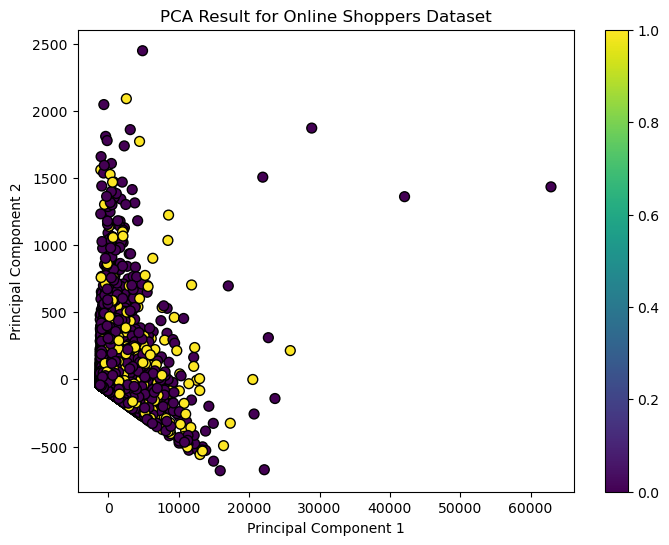

In [89]:
# Applying PCA
pca_online_shoppers = PCA(n_components=2)
online_shoppers_principal_components = pca_online_shoppers.fit_transform(online_shoppers_df_encoded)

# Plotting the results
plt.figure(figsize=(8, 6))
plt.scatter(online_shoppers_principal_components[:, 0], online_shoppers_principal_components[:, 1],
            c=online_shoppers_target_df['Revenue'], cmap='viridis', edgecolor='k', s=50)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Result for Online Shoppers Dataset')
plt.colorbar()
plt.show()

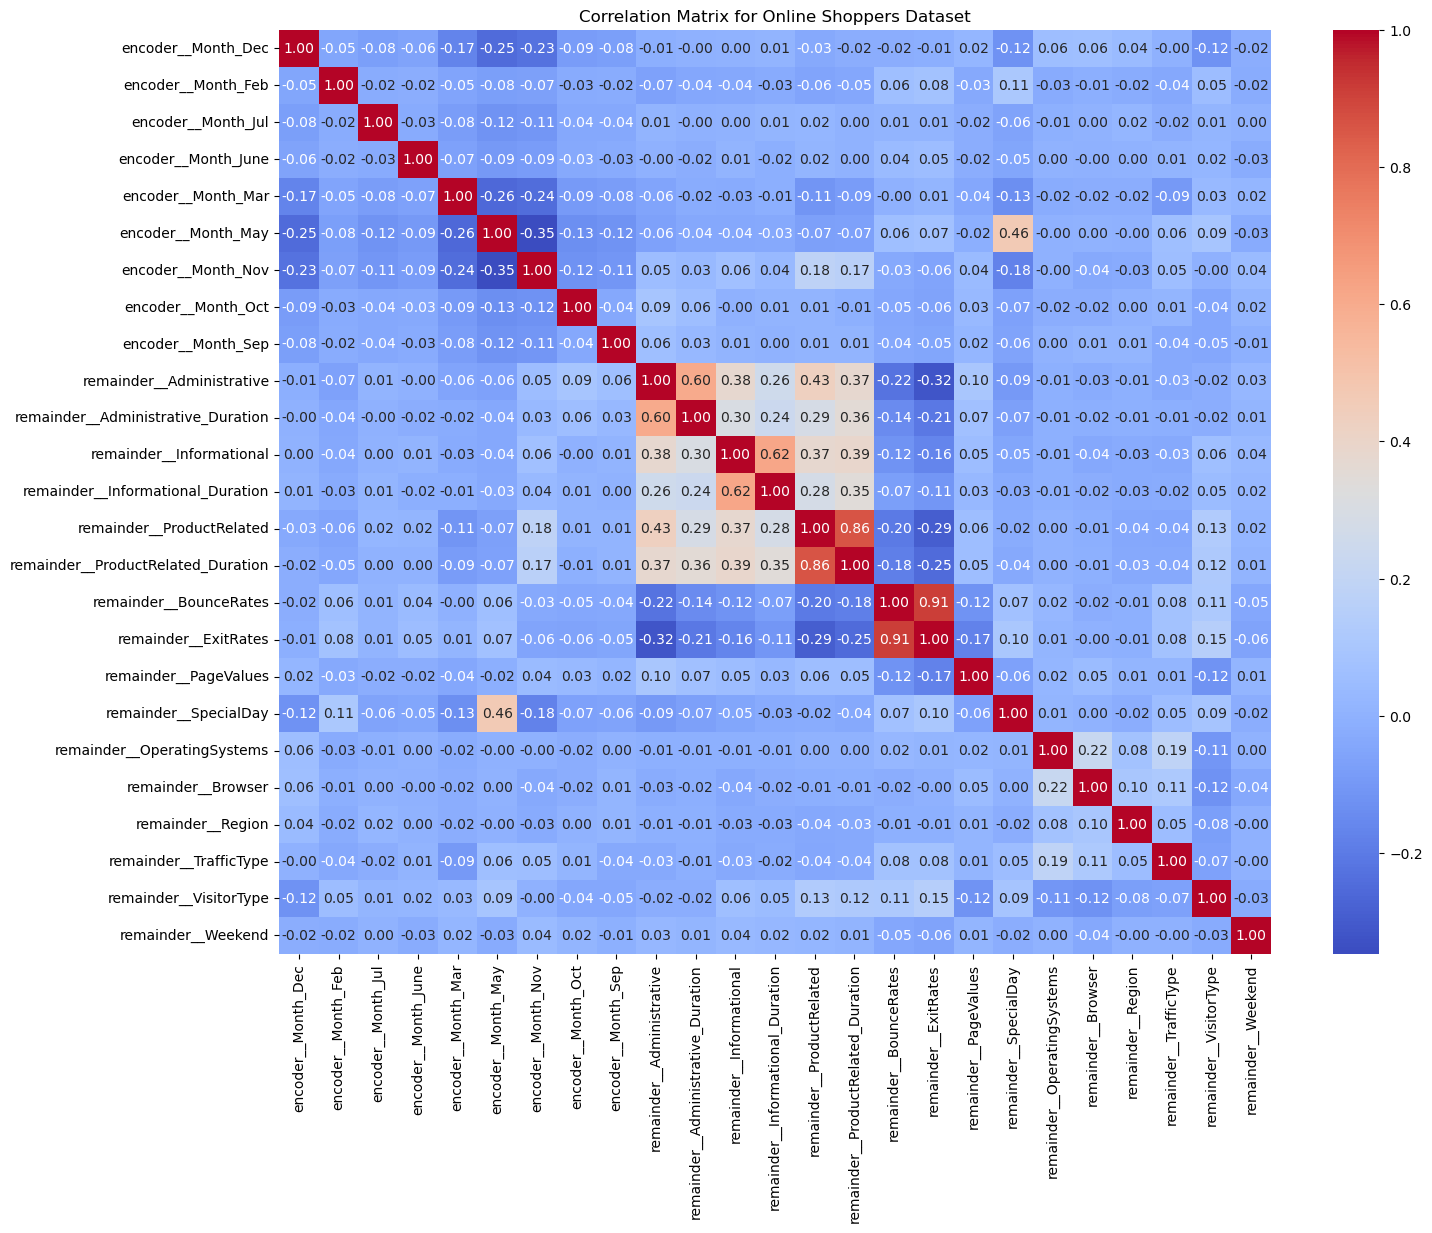

In [42]:
# Correlation matrix and heatmap for Online Shoppers Dataset
plt.figure(figsize=(16, 12))
sns.heatmap(online_shoppers_df_encoded.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix for Online Shoppers Dataset')
plt.show()

#### **Data Cleaning and Data Preprocessing for  estimation of obesity levels Dataset**

In [90]:
object_columns_in_estimation_of_obesity_df = estimation_of_obesity_df.select_dtypes(include='object').columns
print("Object Columns in estimation of obesity: ",object_columns_in_estimation_of_obesity_df)

Object Columns in estimation of obesity:  Index(['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE',
       'SCC', 'CALC', 'MTRANS'],
      dtype='object')


In [91]:
# List of columns 
columns =  ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']

# Loop through each column and print its unique values
for col in columns:
    print(f"Unique values in '{col}': {estimation_of_obesity_df[col].unique()}")

Unique values in 'Gender': ['Female' 'Male']
Unique values in 'family_history_with_overweight': ['yes' 'no']
Unique values in 'FAVC': ['no' 'yes']
Unique values in 'CAEC': ['Sometimes' 'Frequently' 'Always' 'no']
Unique values in 'SMOKE': ['no' 'yes']
Unique values in 'SCC': ['no' 'yes']
Unique values in 'CALC': ['no' 'Sometimes' 'Frequently' 'Always']
Unique values in 'MTRANS': ['Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike']


In [92]:
# Define the mappings
binary_mapping = {'no': 0, 'yes': 1}
gender_mapping = {'Female': 0, 'Male': 1}
quadra_mapping = { 'Sometimes': 1, 'Frequently': 2, 'Always': 3, 'no': 0}

# Columns to map 
binary_columns = ['family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC']
quadra_columns = ['CAEC', 'CALC']

# Apply the mappings
estimation_of_obesity_df['Gender'] = estimation_of_obesity_df['Gender'].replace(gender_mapping)

for column in binary_columns:
    if column in estimation_of_obesity_df.columns:  # Check if the column exists in the DataFrame
        estimation_of_obesity_df[column] = estimation_of_obesity_df[column].replace(binary_mapping)

for column in quadra_columns:
    if column in estimation_of_obesity_df.columns:  # Check if the column exists in the DataFrame
        estimation_of_obesity_df[column] = estimation_of_obesity_df[column].replace(quadra_mapping)

In [93]:
# Initialize OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse=False)  # drop='first' to avoid multicollinearity
ct = ColumnTransformer(transformers=[('encoder', encoder, ['MTRANS'])], remainder='passthrough')

# Fit and transform the data
estimation_of_obesity_df_encoded = ct.fit_transform(estimation_of_obesity_df)

# Convert back to DataFrame (optional step to retain DataFrame structure)
encoded_feature_names = ct.get_feature_names_out()
estimation_of_obesity_df_encoded = pd.DataFrame(estimation_of_obesity_df_encoded, columns=encoded_feature_names)

In [94]:
estimation_of_obesity_target_df['NObeyesdad'].unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

In [95]:
category_mapping = {
    'Normal_Weight': 0,
    'Overweight_Level_I': 1,
    'Overweight_Level_II': 2,
    'Obesity_Type_I': 3,
    'Insufficient_Weight': 4,
    'Obesity_Type_II': 5,
    'Obesity_Type_III': 6
}
# Applying the mapping to the DataFrame
estimation_of_obesity_target_df['NObeyesdad'] = estimation_of_obesity_target_df['NObeyesdad'].map(category_mapping)

In [96]:
estimation_of_obesity_df_encoded.shape

(2111, 19)

In [97]:
estimation_of_obesity_target_df.shape

(2111, 1)

In [110]:
# Save the DataFrame to a CSV file
estimation_of_obesity_df_encoded.to_csv('estimation_of_obesity_encoding_data.csv', index=False)
estimation_of_obesity_target_df.to_csv('estimation_of_obesity_target.csv', index=False)

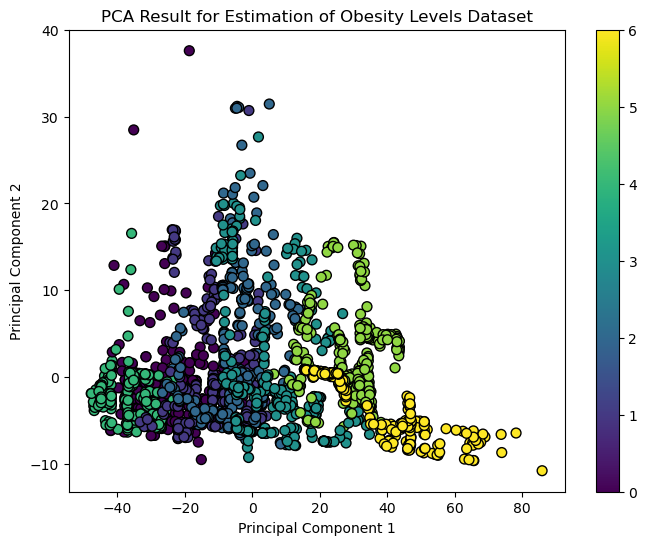

In [98]:
# Applying PCA
pca_obesity = PCA(n_components=2)
obesity_principal_components = pca_obesity.fit_transform(estimation_of_obesity_df_encoded)

# Plotting the results
plt.figure(figsize=(8, 6))
plt.scatter(obesity_principal_components[:, 0], obesity_principal_components[:, 1], c=estimation_of_obesity_target_df['NObeyesdad'], 
            cmap='viridis', edgecolor='k', s=50)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Result for Estimation of Obesity Levels Dataset')
plt.colorbar()
plt.show()

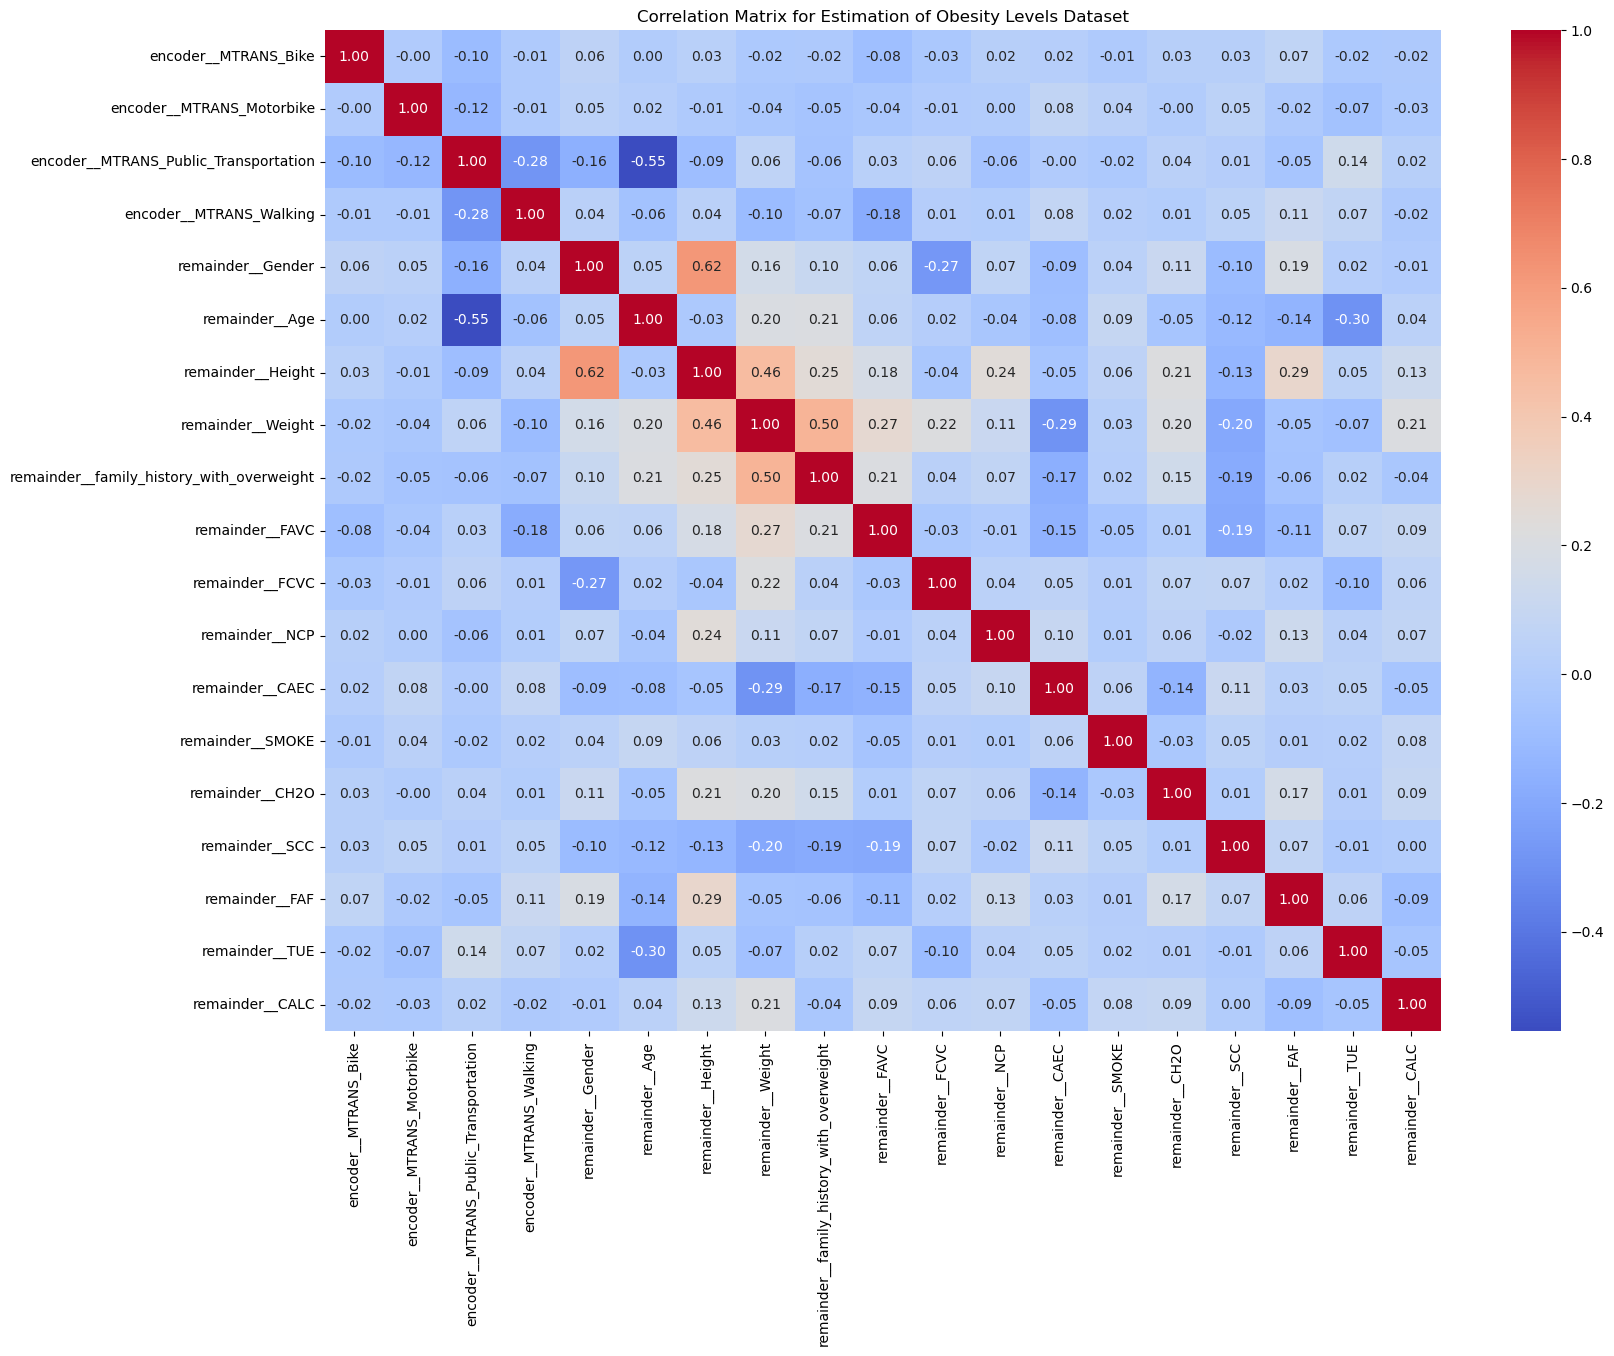

In [99]:
# Correlation matrix and heatmap for Estimation of Obesity Levels Dataset
plt.figure(figsize=(18, 13))
sns.heatmap(estimation_of_obesity_df_encoded.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix for Estimation of Obesity Levels Dataset')
plt.show()

#### **Data splitting and modelling functions**

In [53]:
def splitting_the_data(df, target_df):
    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(df, target_df, test_size=0.3, random_state=42)

    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    return X_train_scaled, X_test_scaled, y_train, y_test

def train_model(X_train, X_test, y_train, y_test, model):
    # Train model
    model.fit(X_train, y_train)
    # Predict on test set
    y_pred = model.predict(X_test)
    y_test = y_test
    conf_mat = confusion_matrix(y_test, y_pred)
    # Output results
    print(f"Model: {model.__class__.__name__}")
    print("Confusion Matrix:\n", conf_mat)
    print("Classification Report:\n", classification_report(y_test, y_pred))
    
    # Evaluation for multiclass classification
    precision = precision_score(y_test, y_pred, average='weighted') 
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    acc_score = accuracy_score(y_test, y_pred)
    
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'F1 Score: {f1}')
    print(f'Accuracy: {acc_score}')
    print("\n")
    return [conf_mat, {'F1 Score': f1, 'Accuracy': acc_score}]

#### **Initialize a RandomForestClassifier using sklearn and xgb libraries**

In [100]:
# Initialize a RandomForestClassifier with 100 trees and a fixed random state for reproducibility.
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Initialize XGBoost's random forest classifier with 100 trees and a fixed random state.
xgb_rf = xgb.XGBRFClassifier(n_estimators=100, random_state=42)

#### **Initialize a Decision Tree Classifier using sklearn and LightGBM libraries**

In [55]:
# Initialize the Decision Tree Classifier from Scikit-learn
dt_classifier_sklearn = DecisionTreeClassifier(random_state=42)

# Initialize the LightGBM Decision Tree Classifier
# For a single tree, set num_boost_round to 1 and boost_from_average to False
dt_classifier_lgbm = lgb.LGBMClassifier(boosting_type='gbdt',  # Gradient Boosting Decision Tree
                                        num_leaves=31,         # Max number of leaves in one tree
                                        max_depth=-1,          # No limit on depth, since we want a single tree
                                        learning_rate=0.1,     # Learning rate, you can adjust this if necessary
                                        n_estimators=1,        # Number of boosted trees to fit, 1 for a single tree
                                        random_state=42,       # Seed for reproducibility
                                        boost_from_average=False) # This should be False for a single decision tree

#### **Results of  Bank Marketing Dataset**

In [101]:
# Splitting the data
X_train, X_test, y_train, y_test = splitting_the_data(bank_marketing_df_encoded, bank_marketing_target_df)

print("Evaluating Random Forest classifier on Bank Marketing Dataset")
bank_marketing_rf_scores = train_model(X_train, X_test, y_train, y_test, rf_classifier)

print("Evaluating XGBoost's random forest classifier on Bank Marketing Dataset")
bank_marketing_xgb_rf_scores = train_model(X_train, X_test, y_train, y_test, xgb_rf)

print("Evaluating  Decision Tree Classifier on Bank Marketing Dataset")
bank_marketing_dt_scores = train_model(X_train, X_test, y_train, y_test, dt_classifier_sklearn)

print("Evaluating LightGBM Decision Tree Classifier on Bank Marketing Dataset")
bank_marketing_lgbm_scores = train_model(X_train, X_test, y_train, y_test, dt_classifier_lgbm)

Evaluating Random Forest classifier on Bank Marketing Dataset
Model: RandomForestClassifier
Confusion Matrix:
 [[11601   324]
 [  989   563]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.95     11925
           1       0.63      0.36      0.46      1552

    accuracy                           0.90     13477
   macro avg       0.78      0.67      0.70     13477
weighted avg       0.89      0.90      0.89     13477

Precision: 0.8884269496583985
Recall: 0.9025747569933962
F1 Score: 0.8906145186360269
Accuracy: 0.9025747569933962


Evaluating XGBoost's random forest classifier on Bank Marketing Dataset
Model: XGBRFClassifier
Confusion Matrix:
 [[11258   667]
 [  704   848]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94     11925
           1       0.56      0.55      0.55      1552

    accuracy                           0.90     13477
   

#### **Results of Online Shoppers Purchasing Intention Dataset**

In [102]:
# Splitting the data
X_train, X_test, y_train, y_test = splitting_the_data(online_shoppers_df_encoded, online_shoppers_target_df)

print("Evaluating Random Forest classifier on Online Shoppers Purchasing Intention Dataset")
online_shoppers_rf_scores = train_model(X_train, X_test, y_train, y_test, rf_classifier)

print("Evaluating XGBoost's random forest classifier on Online Shoppers Purchasing Intention Dataset")
online_shoppers_xgb_rf_scores = train_model(X_train, X_test, y_train, y_test, xgb_rf)

print("Evaluating Decision Tree Classifier on Online Shoppers Purchasing Intention Dataset")
online_shoppers_dt_scores = train_model(X_train, X_test, y_train, y_test, dt_classifier_sklearn)

print("Evaluating LightGBM Decision Tree Classifier on Online Shoppers Purchasing Intention Dataset")
online_shoppers_lgbm_scores = train_model(X_train, X_test, y_train, y_test, dt_classifier_lgbm)

Evaluating Random Forest classifier on Online Shoppers Purchasing Intention Dataset
Model: RandomForestClassifier
Confusion Matrix:
 [[3000  124]
 [ 246  329]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.96      0.94      3124
           1       0.73      0.57      0.64       575

    accuracy                           0.90      3699
   macro avg       0.83      0.77      0.79      3699
weighted avg       0.89      0.90      0.89      3699

Precision: 0.8934443626783621
Recall: 0.8999729656663963
F1 Score: 0.8949953820482054
Accuracy: 0.8999729656663963


Evaluating XGBoost's random forest classifier on Online Shoppers Purchasing Intention Dataset
Model: XGBRFClassifier
Confusion Matrix:
 [[2941  183]
 [ 200  375]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94      3124
           1       0.67      0.65      0.66       575

    accuracy         

#### **Results of Estimate of Obesity levels dataset**

In [103]:
# Splitting the data
X_train, X_test, y_train, y_test = splitting_the_data(estimation_of_obesity_df_encoded, estimation_of_obesity_target_df)

print("Evaluating Random Forest classifier on Estimate of Obesity levels dataset")
estimation_of_obesity_rf_scores = train_model(X_train, X_test, y_train, y_test, rf_classifier)

print("Evaluating XGBoost's random forest classifier on Estimate of Obesity levels dataset")
estimation_of_obesity_xgb_rf_scores = train_model(X_train, X_test, y_train, y_test, xgb_rf)

print("Evaluating Decision Tree Classifier on Estimate of Obesity levels dataset")
estimation_of_obesity_dt_scores = train_model(X_train, X_test, y_train, y_test, dt_classifier_sklearn)

print("Evaluating LightGBM Decision Tree Classifier on Estimate of Obesity levels dataset")
estimation_of_obesity_lgbm_scores = train_model(X_train, X_test, y_train, y_test, dt_classifier_lgbm)

Evaluating Random Forest classifier on Estimate of Obesity levels dataset
Model: RandomForestClassifier
Confusion Matrix:
 [[83  6  0  0  4  0  0]
 [12 74  2  0  0  0  0]
 [ 2  4 73  0  0  0  0]
 [ 2  0  1 96  0  3  0]
 [ 5  0  0  0 81  0  0]
 [ 0  0  0  1  0 87  0]
 [ 0  0  0  1  0  0 97]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.89      0.84        93
           1       0.88      0.84      0.86        88
           2       0.96      0.92      0.94        79
           3       0.98      0.94      0.96       102
           4       0.95      0.94      0.95        86
           5       0.97      0.99      0.98        88
           6       1.00      0.99      0.99        98

    accuracy                           0.93       634
   macro avg       0.93      0.93      0.93       634
weighted avg       0.93      0.93      0.93       634

Precision: 0.9346443493807693
Recall: 0.9321766561514195
F1 Score: 0.9328279301418638
A

#### **Confusion Matrix of 3 datasets for 4 models**

In [104]:
#visualization: confusion matrix for all three datasets
cmap = sns.cubehelix_palette(dark=0.3, light=0.85, as_cmap=True)
dataset_names = ['Bank Marketing', 'Onln Shoppers purchasing Intent', 'Estimation of Obesity Levels']
conf_mat_results = {
    'Bank Marketing': {
        'Random Forest': bank_marketing_rf_scores[0],
        'Random Forest Using XGB': bank_marketing_xgb_rf_scores[0],
        'Decision Tree': bank_marketing_dt_scores[0],
        'Decision Tree Using LightGBM': bank_marketing_lgbm_scores[0]
    },
    'Onln Shoppers purchasing Intent': {
        'Random Forest': online_shoppers_rf_scores[0],
        'Random Forest Using XGB': online_shoppers_xgb_rf_scores[0],
        'Decision Tree': online_shoppers_dt_scores[0],
        'Decision Tree Using LightGBM': online_shoppers_lgbm_scores[0]
    },
    'Estimation of Obesity Levels': {
        'Random Forest': estimation_of_obesity_rf_scores[0],
        'Random Forest Using XGB': estimation_of_obesity_xgb_rf_scores[0],
        'Decision Tree': estimation_of_obesity_dt_scores[0],
        'Decision Tree Using LightGBM': estimation_of_obesity_lgbm_scores[0]
    }
}

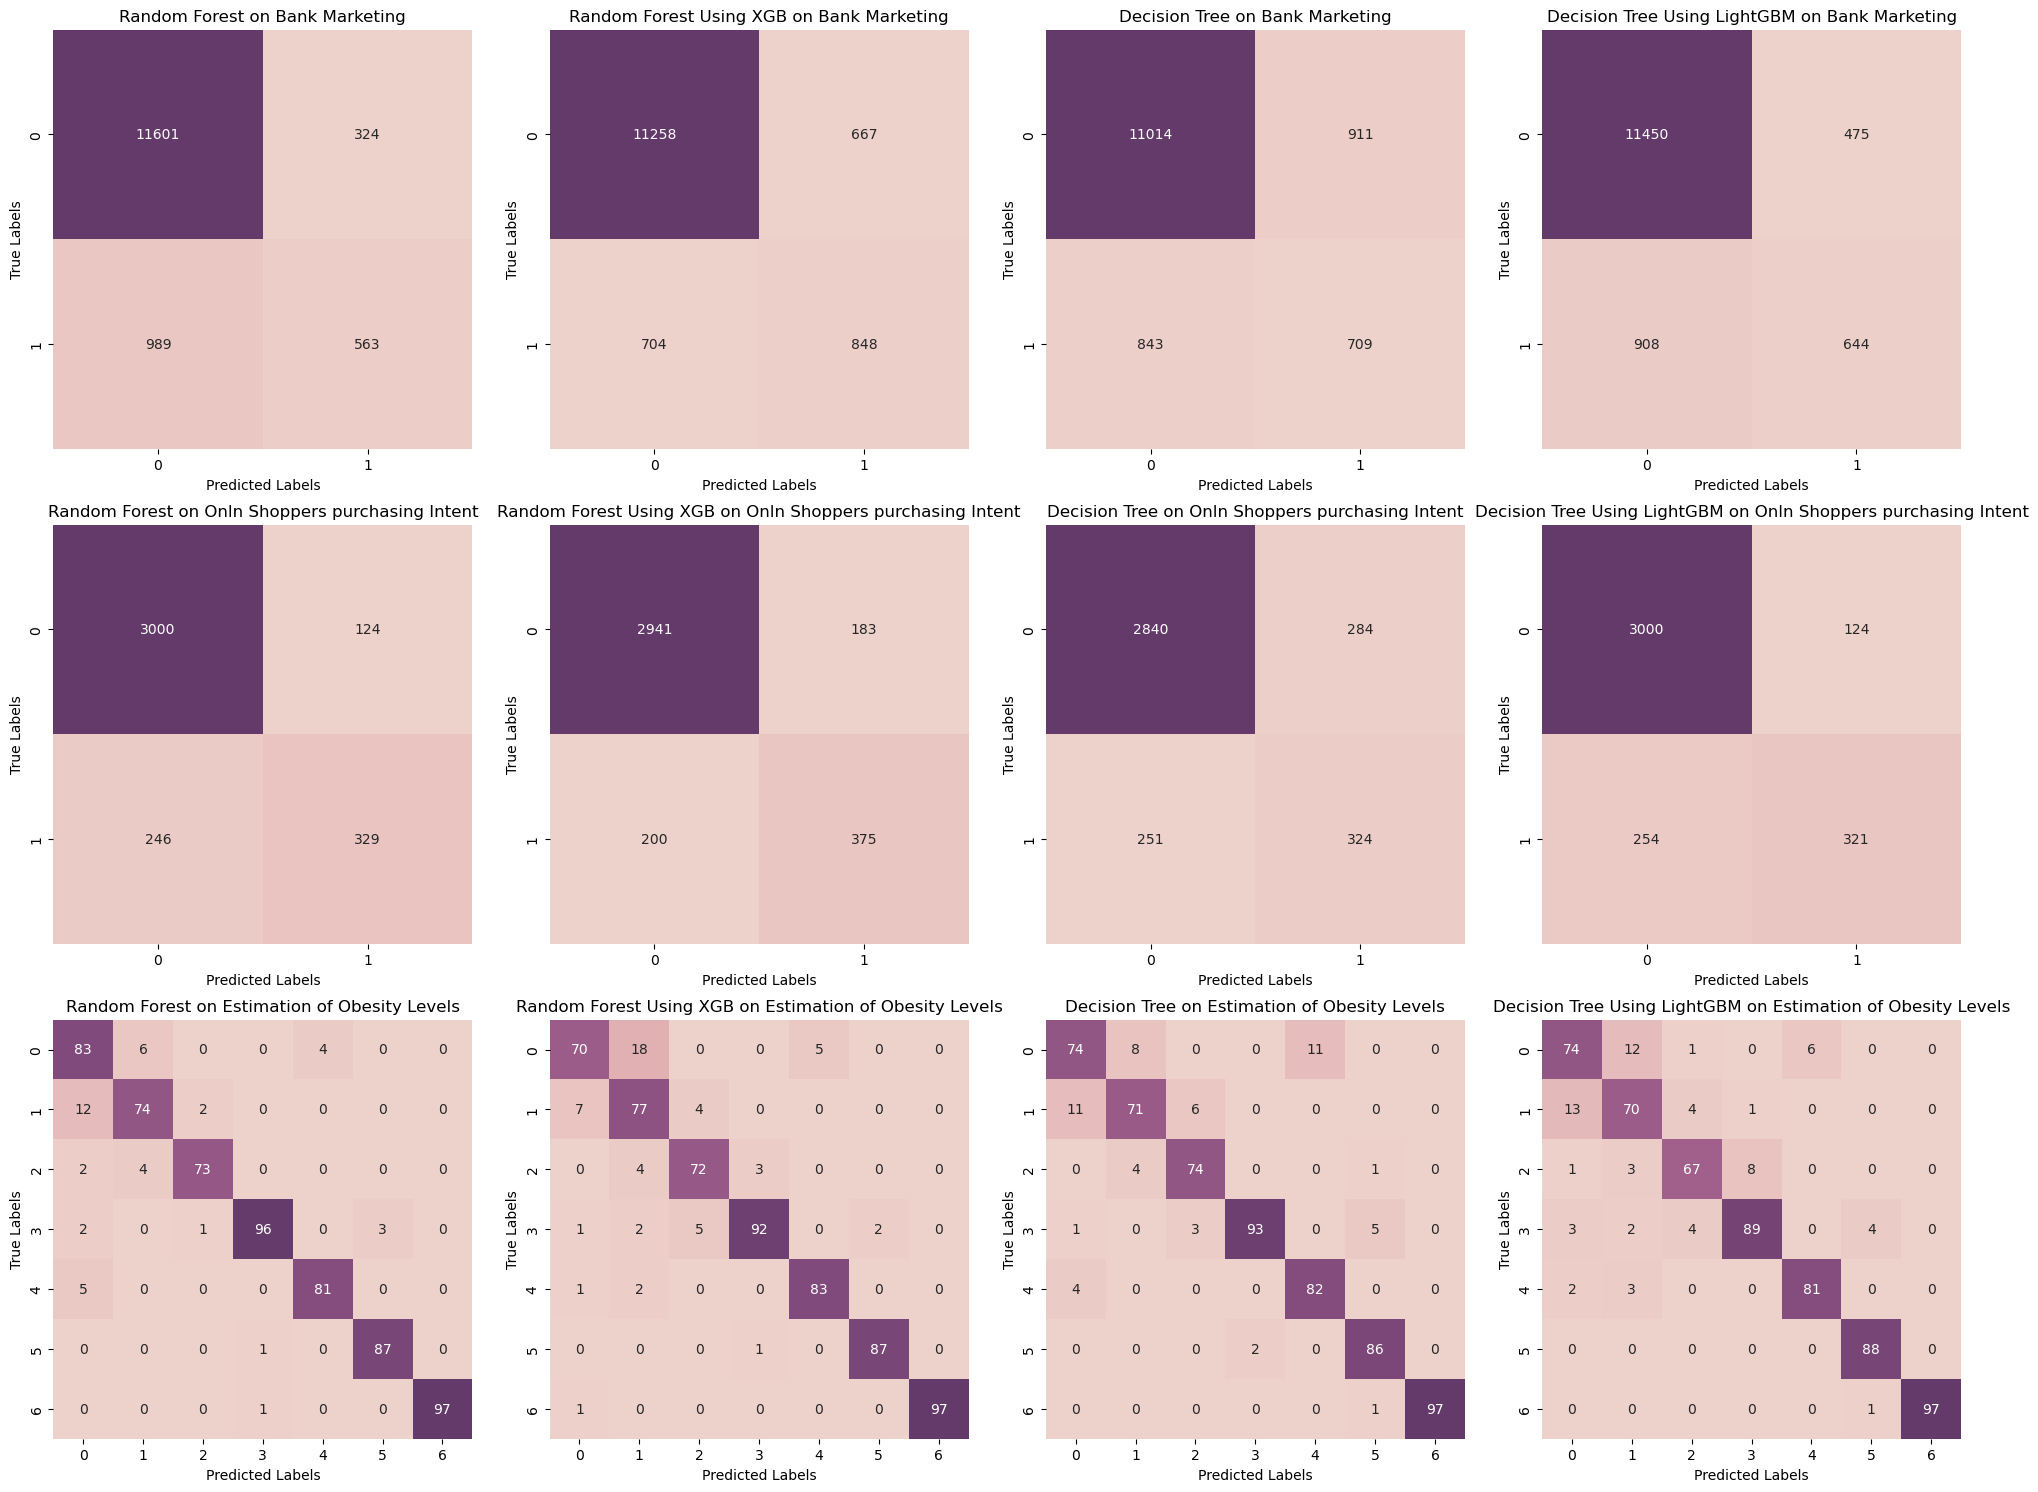

In [105]:
def plot_confusion_matrices(results, dataset_names):
    num_datasets = len(results)
    fig, axes = plt.subplots(nrows=num_datasets, ncols=4, figsize=(20, num_datasets * 5))  # Adjust size as needed

    for i, dataset in enumerate(dataset_names):
        model_names = results[dataset].keys()
        for j, model in enumerate(model_names):
            ax = axes[i][j] if num_datasets > 1 else axes[j]
            sns.heatmap(results[dataset][model], annot=True, fmt="d", ax=ax, cmap=cmap, cbar=False)
            ax.set_title(f'{model} on {dataset}')
            ax.set_xlabel('Predicted Labels')
            ax.set_ylabel('True Labels')
            ax.set_aspect('equal')

    plt.tight_layout()
    plt.show()

plot_confusion_matrices(conf_mat_results, dataset_names)

#### **Bar Plots of F1 Score and Accuracy of 4 models of 3 datasets**

In [106]:
results = {
    'Bank Marketing': {
        'Random Forest': bank_marketing_rf_scores[1],
        'Random Forest Using XGB': bank_marketing_xgb_rf_scores[1],
        'Decision Tree': bank_marketing_dt_scores[1],
        'Decision Tree Using LightGBM': bank_marketing_lgbm_scores[1]
    },
    'Online Shoppers Purchasing Intention': {
        'Random Forest': online_shoppers_rf_scores[1],
        'Random Forest Using XGB': online_shoppers_xgb_rf_scores[1],
        'Decision Tree': online_shoppers_dt_scores[1],
        'Decision Tree Using LightGBM': online_shoppers_lgbm_scores[1]
    },
    'Estimation of Obesity Levels': {
        'Random Forest': estimation_of_obesity_rf_scores[1],
        'Random Forest Using XGB': estimation_of_obesity_xgb_rf_scores[1],
        'Decision Tree': estimation_of_obesity_dt_scores[1],
        'Decision Tree Using LightGBM': estimation_of_obesity_lgbm_scores[1]
    }
}

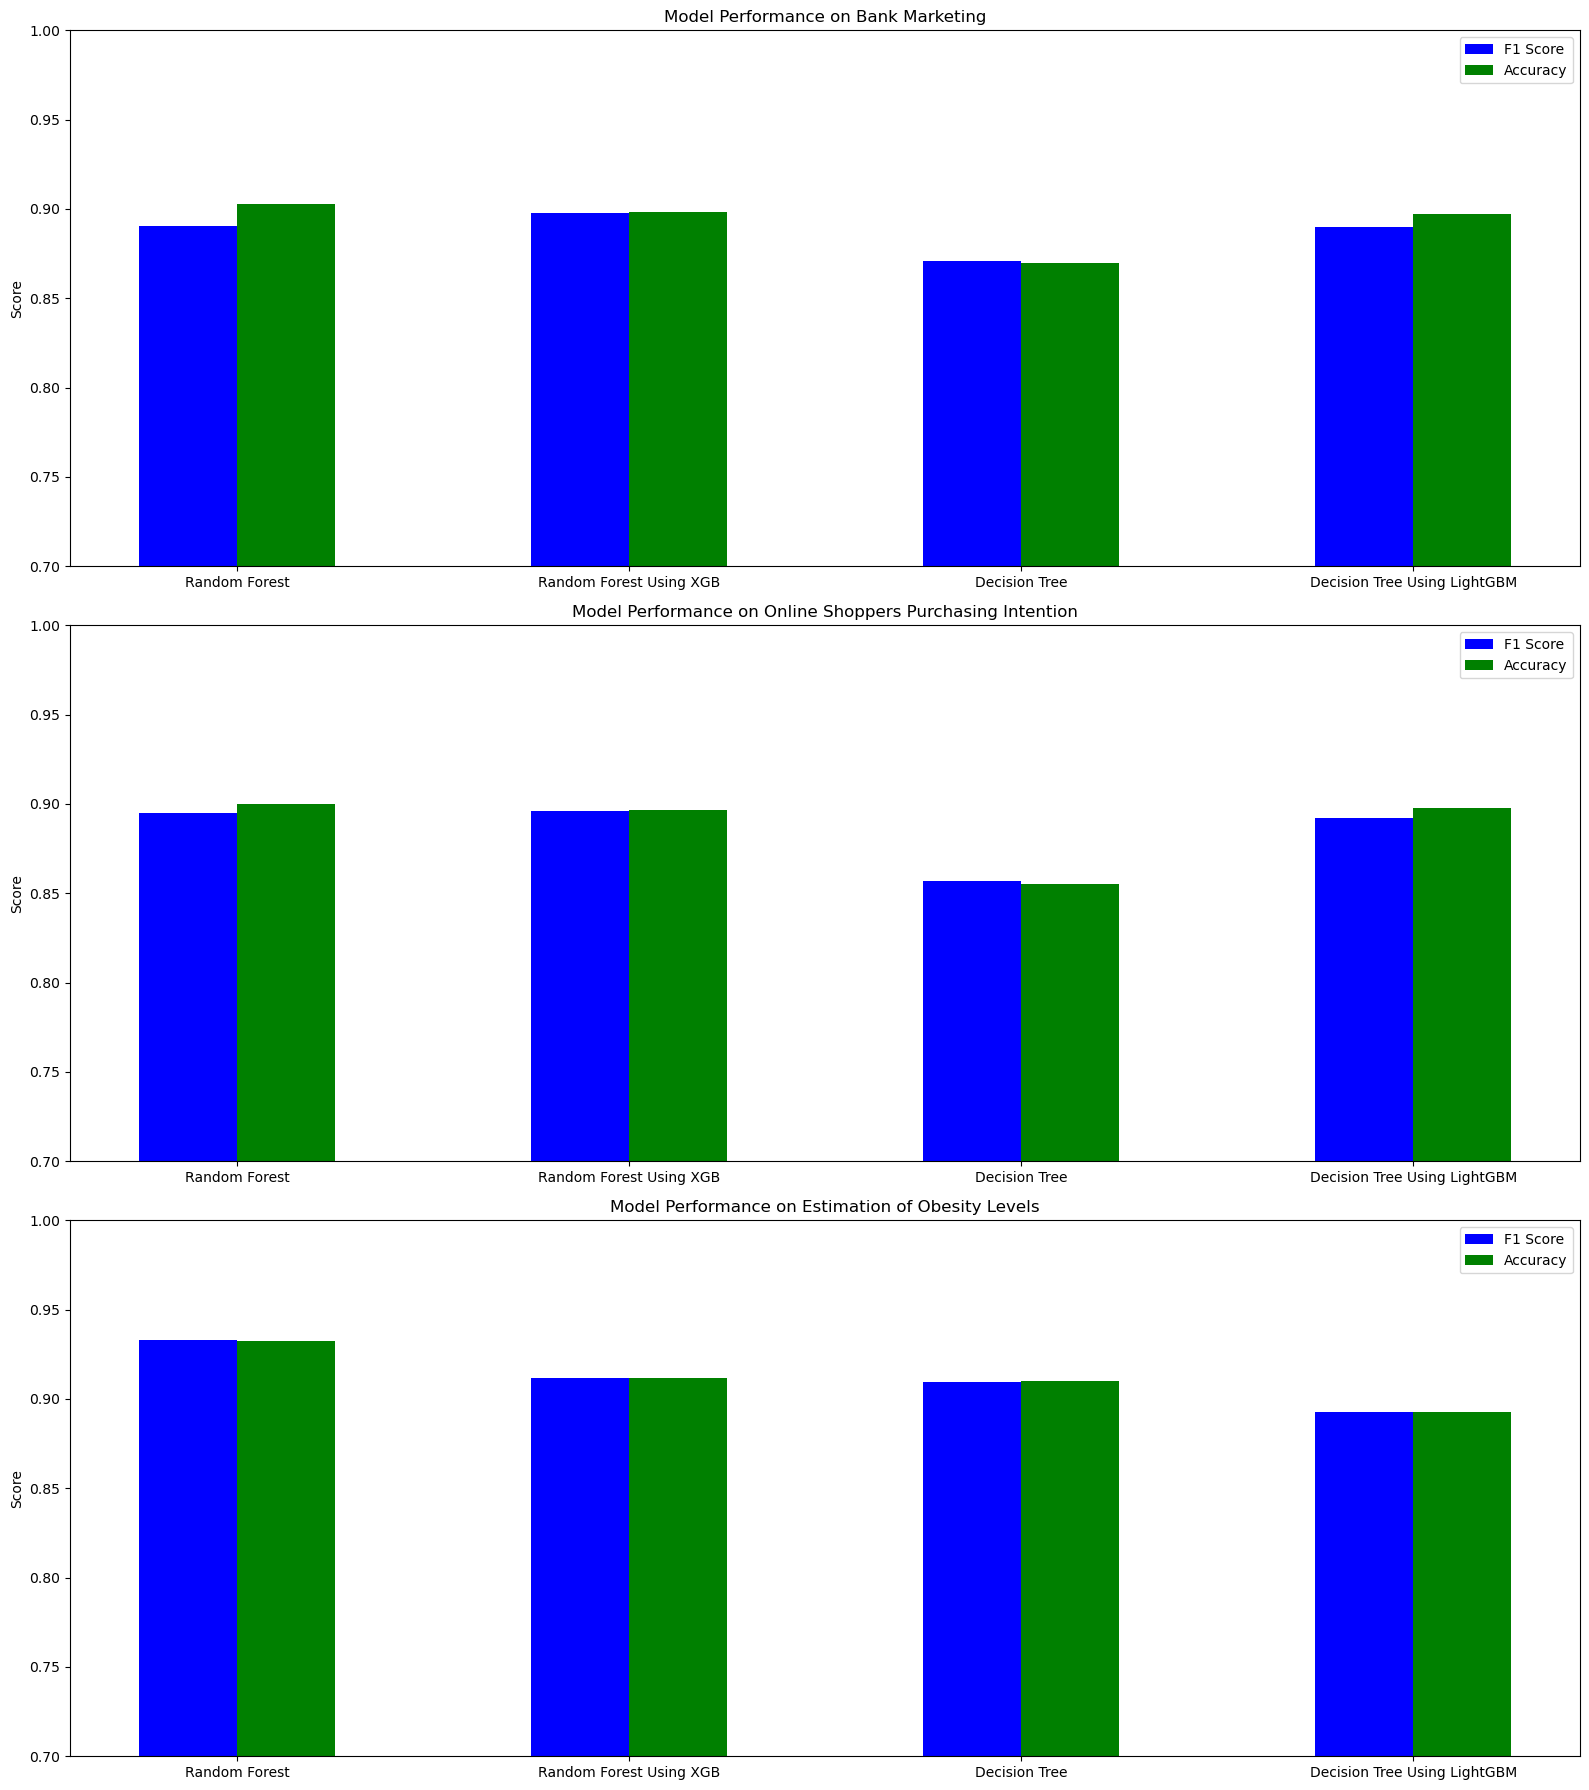

In [107]:
# Define figure and axes
fig, axes = plt.subplots(3, 1, figsize=(16, 18), sharey=True)  # Adjusted figure size for better spacing

# Define bar width and positions
bar_width = 0.35
index = np.arange(len(results['Bank Marketing'])) * 2  # Increase the multiplier for more space

# Loop over each dataset and plot
for i, (dataset, performances) in enumerate(results.items()):
    f1_scores = [performances[model]['F1 Score'] for model in performances]
    accuracies = [performances[model]['Accuracy'] for model in performances]

    # Calculate positions for each bar
    bar_positions_f1 = index * (bar_width + bar_width) 
    bar_positions_acc = bar_positions_f1 + bar_width

    # Plotting each metric side by side
    axes[i].bar(bar_positions_f1, f1_scores, bar_width, label='F1 Score', color='b')
    axes[i].bar(bar_positions_acc, accuracies, bar_width, label='Accuracy', color='g')

    # Set title and labels
    axes[i].set_title(f'Model Performance on {dataset}')
    axes[i].set_xticks(bar_positions_f1 + bar_width / 2)
    axes[i].set_xticklabels(performances.keys())
    axes[i].set_ylabel('Score')
    axes[i].legend()

    # Set common limits
    axes[i].set_ylim(0.7, 1)  # Adjust as necessary

plt.tight_layout()
plt.show()